# Dense Optical Flow

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
%matplotlib inline

def plot_image(title, image, cmap=None):
    plt.figure(figsize=(20,20))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.show()

# Example 1: Dense Optical Flow on 2 Images

In this example, we will explore Dense Optical Flow on 2 images. Dense Optical Flow is used when **we're tracking every pixel of an image**. It is **longer** than Sparse Optical Flow but **works much better**.

In [21]:
#Load the 2 consecutive images and convert them to grayscale
im1 = cv2.imread("data/images/image0.jpg")
im2 = cv2.imread("data/images/image1.jpg")
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In [22]:
#Create a mask in HSV Color Space.
hsv = np.zeros_like(im1)
# Sets image saturation to maximum.
hsv[..., 1] = 255

Now comes the Optical Flow Algorithm. This time, we'll use the Farneback algorithm (2003).
Unlike the Lucas Kanade method, we don't want to find "next, status, and error". This time, we just want to estimate one output, the **flow**.

If you'd like to understand how to tweak the parameters, you can [visit this link](https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback).

The next step is to calculate this flow, and convert it into a visual output.

In [23]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

### But what is the Flow?
**The Flow is a 2D Matrix** that has the same size as our input frame (image 1). In this matrix, we have the **optical flow vectors U and V**. These are made of point coordinates. **For any point P (x,y) in the grayscale image, the flow contains the corresponding (delta_x, delta_y)**, i.e., how much did that pixel move in the X and Y direction.

In [24]:
print("Shapes Gray & Flow")
print(gray1.shape)
print(flow.shape)
print(" ")

print("Flow Output")
print(flow)
print(" ")

print("U Vector")
print(flow[...,0])
print(" ")

print("V Vector")
print(flow[...,1])
print(" ")

Shapes Gray & Flow
(432, 768)
(432, 768, 2)
 
Flow Output
[[[-8.606705   -0.46653652]
  [-8.967901   -0.5036245 ]
  [-9.011185   -0.5011998 ]
  ...
  [23.189276   -8.995762  ]
  [23.200577   -9.006791  ]
  [22.84172    -9.010163  ]]

 [[-8.669753   -0.6251331 ]
  [-8.971131   -0.624706  ]
  [-9.027629   -0.61310124]
  ...
  [23.269274   -8.964831  ]
  [23.309032   -8.968984  ]
  [23.059587   -8.960802  ]]

 [[-8.697428   -0.649018  ]
  [-8.95854    -0.64226425]
  [-9.0307255  -0.6300936 ]
  ...
  [23.46124    -8.884274  ]
  [23.560646   -8.883723  ]
  [23.502108   -8.867053  ]]

 ...

 [[ 4.4493804  -6.9319096 ]
  [ 5.515306   -7.9730816 ]
  [ 6.740018   -8.880184  ]
  ...
  [-8.005964   -2.4440458 ]
  [-5.9824815  -1.8417977 ]
  [-4.240536   -1.2768935 ]]

 [[ 4.2441535  -6.651492  ]
  [ 5.438955   -7.7849603 ]
  [ 6.6974072  -8.714903  ]
  ...
  [-7.782724   -2.3513496 ]
  [-5.68055    -1.7401717 ]
  [-3.9246738  -1.1770893 ]]

 [[ 3.5780997  -5.795508  ]
  [ 4.8877645  -7.0012627 ]


**We have 2 vectors U and V**, which correspond to the first and second column of the flow output in cartesian coordinates.

---

According to OpenCV: "We get **a 2-channel array** with **optical flow vectors, (u,v)**. We find their **magnitude** and **direction**. We color code the result for better visualization. **Direction corresponds to Hue** value of the image. **Magnitude corresponds to Value plane**."

---

In other words, it's possible to make something with "the point moved 2 pixels to the right"! We find the Magnitude and Angle, convert that to HSV Space (Hue, Saturation, Value) and then make it an image.

I know this sounds horrible, but we need to go back to High School Maths (or maybe college), and remember about Vectors in Cartesian and Polar coordinates. Of course, **the vectors represent the displacements of each pixels.**

*   A vector in **cartesian** coordinates has its values in **(x,y)**.
*   A vector in **polar** coordinates has its values in **Radian**.
![](https://cdn.kastatic.org/ka-perseus-images/1559d8785a298fdd0bac0443388b3812c4327ec3.png)

To compute the Polar coordinates, we must calculate the magnitude and the angle of the vector.

In [25]:
# Computes the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

print(magnitude)
print(angle)

[[ 8.61934    8.982032   9.025113  ... 24.873003  24.887527  24.554577 ]
 [ 8.692262   8.992856   9.048424  ... 24.936466  24.97506   24.739452 ]
 [ 8.721609   8.981533   9.05268   ... 25.087051  25.179846  25.119188 ]
 ...
 [ 8.237012   9.694774  11.148341  ...  8.370712   6.259577   4.428612 ]
 [ 7.8901954  9.496728  10.991123  ...  8.130169   5.941115   4.0973897]
 [ 6.8110733  8.538613  10.181647  ...  6.552034   4.4436617  2.822607 ]]
[[3.1957355 3.1976817 3.1971445 ... 5.9130516 5.912803  5.9073853]
 [3.2135606 3.2111032 3.2093904 ... 5.9153686 5.915786  5.912473 ]
 [3.2160637 3.2131507 3.2112396 ... 5.921117  5.922536  5.922334 ]
 ...
 [5.2829237 5.317422  5.361523  ... 3.4379382 3.4403043 3.4341247]
 [5.2802353 5.3220787 5.367537  ... 3.4350493 3.4389086 3.4330275]
 [5.2654166 5.3217273 5.376289  ... 3.4252064 3.4279673 3.421077 ]]


In [26]:
# Sets image hue according to the optical flow direction
hsv[..., 0] = angle * 180 / np.pi / 2

print(hsv)

[[[ 91 255   0]
  [ 91 255   0]
  [ 91 255   0]
  ...
  [169 255   0]
  [169 255   0]
  [169 255   0]]

 [[ 92 255   0]
  [ 91 255   0]
  [ 91 255   0]
  ...
  [169 255   0]
  [169 255   0]
  [169 255   0]]

 [[ 92 255   0]
  [ 92 255   0]
  [ 91 255   0]
  ...
  [169 255   0]
  [169 255   0]
  [169 255   0]]

 ...

 [[151 255   0]
  [152 255   0]
  [153 255   0]
  ...
  [ 98 255   0]
  [ 98 255   0]
  [ 98 255   0]]

 [[151 255   0]
  [152 255   0]
  [153 255   0]
  ...
  [ 98 255   0]
  [ 98 255   0]
  [ 98 255   0]]

 [[150 255   0]
  [152 255   0]
  [154 255   0]
  ...
  [ 98 255   0]
  [ 98 255   0]
  [ 98 255   0]]]


In [27]:
# Sets image value according to the optical flow magnitude (normalized)
hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
print(hsv)

[[[ 91 255  55]
  [ 91 255  57]
  [ 91 255  57]
  ...
  [169 255 159]
  [169 255 159]
  [169 255 157]]

 [[ 92 255  55]
  [ 91 255  57]
  [ 91 255  58]
  ...
  [169 255 160]
  [169 255 160]
  [169 255 158]]

 [[ 92 255  55]
  [ 92 255  57]
  [ 91 255  58]
  ...
  [169 255 161]
  [169 255 161]
  [169 255 161]]

 ...

 [[151 255  52]
  [152 255  62]
  [153 255  71]
  ...
  [ 98 255  53]
  [ 98 255  40]
  [ 98 255  28]]

 [[151 255  50]
  [152 255  60]
  [153 255  70]
  ...
  [ 98 255  52]
  [ 98 255  38]
  [ 98 255  26]]

 [[150 255  43]
  [152 255  54]
  [154 255  65]
  ...
  [ 98 255  42]
  [ 98 255  28]
  [ 98 255  18]]]


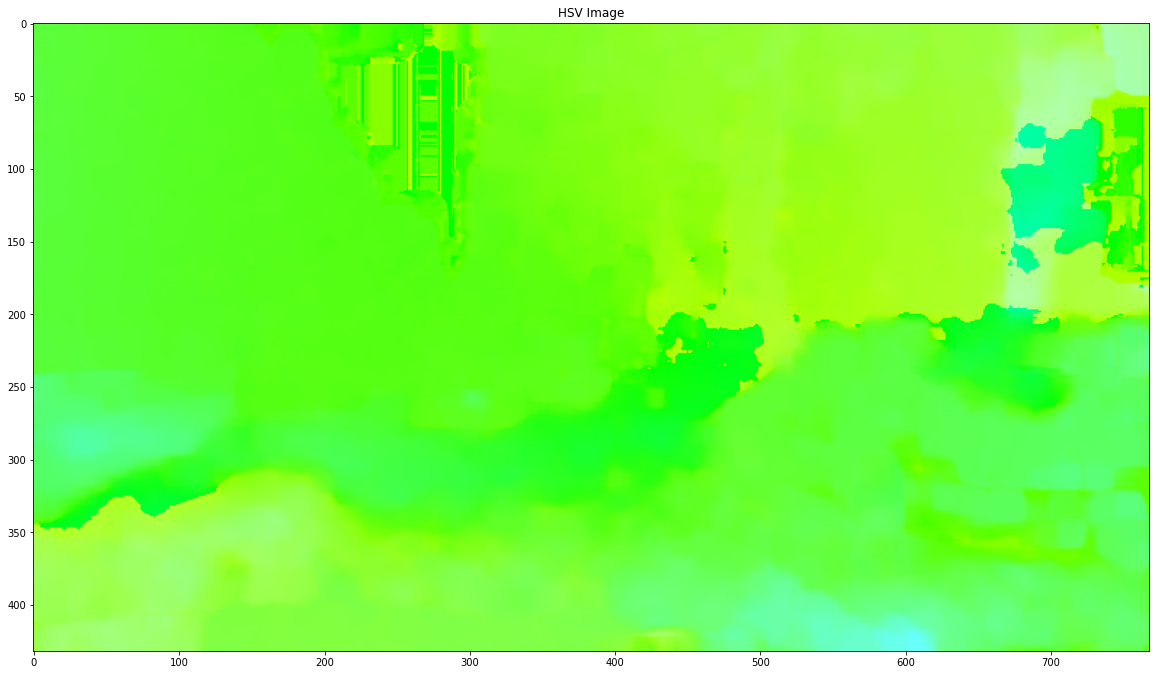

In [28]:
plot_image("HSV Image", hsv)

In [29]:
# Converts HSV to RGB (BGR) color representation
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

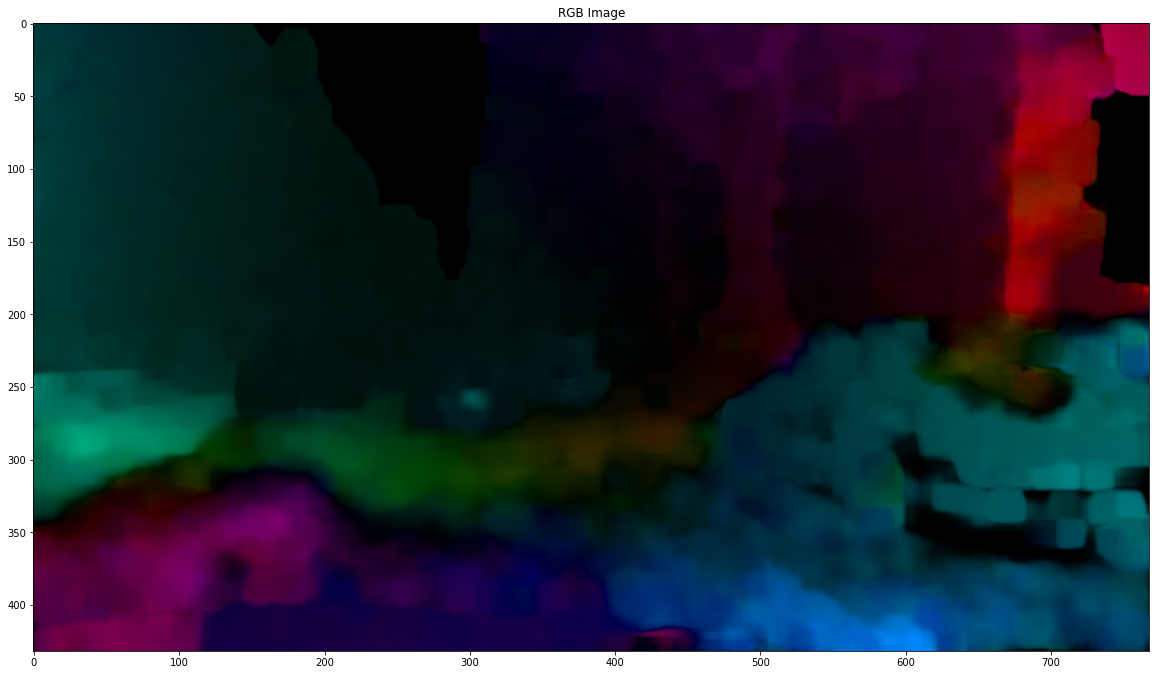

In [30]:
# Display the Output
cv2.imwrite("output/Dense Output.jpg",rgb)
plot_image("RGB Image", rgb)

![](https://www.researchgate.net/profile/Christophoros-Nikou/publication/266149545/figure/fig1/AS:392088710598656@1470492641144/The-optical-flow-field-color-coding-Smaller-vectors-are-lighter-and-color-represents-the.png)

# Example 2: Dense Optical Flow On a video

In [31]:
def farneback_from_image(image):
    global idx, im1
    if idx==0:
        im1 = image
        idx+=1
        return im1
    else:
        im2 = image
        gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
        hsv = np.zeros_like(im1)
        hsv[..., 1] = 255
        flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = angle * 180 / np.pi / 2
        hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
        idx+=1
        im1= image.copy()
        return bgr

In [32]:
from moviepy.editor import VideoFileClip
idx = 0

video_file = "data/videos/skateboard.mp4"
clip = VideoFileClip(video_file).subclip(0,10)
white_clip = clip.fl_image(farneback_from_image)
%time white_clip.write_videofile("output/output_farneback.mp4",audio=False)

Moviepy - Building video output/output_farneback.mp4.
Moviepy - Writing video output/output_farneback.mp4



Moviepy - Done !
Moviepy - video ready output/output_farneback.mp4
CPU times: user 49.4 s, sys: 5.91 s, total: 55.3 s
Wall time: 52.4 s


In [33]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('output/output_farneback.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Example 3: Another Example of Dense Optical Flow on a Video

In [5]:
# The video feed is read in as a VideoCapture object
video_capture = cv2.VideoCapture("data/videos/shibuya.mp4")

# ret = a boolean return value from getting the frame, first_frame = the first frame in the entire video sequence
ret, first_frame = video_capture.read()

# Converts frame to grayscale because we only need the luminance channel for detecting edges - less computationally expensive
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Creates an image filled with zero intensities with the same dimensions as the frame
mask = np.zeros_like(first_frame)

# Sets image saturation to maximum
mask[..., 1] = 255

In [7]:
while(video_capture.isOpened()):
    # ret = a boolean return value from getting the frame, frame = the current frame being projected in the video
    ret, frame = video_capture.read()
    
    # Opens a new window and displays the input frame
    cv2.imshow("input", frame)
    
    # Converts each frame to grayscale - we previously only converted the first frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    
    # Sets image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2
    
    # Sets image value according to the optical flow magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    
    # Opens a new window and displays the output frame
    cv2.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
    
    # Frames are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [9]:
# The following frees up resources and closes all windows
video_capture.release()
cv2.destroyAllWindows()